# **Введение**

Теория Markdown: https://colab.research.google.com/drive/1Y_rmBpWFvF7QCRzSm3tCkDBklJnFOfIw?usp=sharing (задания в этой тетради выполнять не нужно)

**Внимание! При перезапуске первая ячейка грузиться долго. Со следующими все будет ок.**

*Для работы кода может понадобиться библиотека wordcloud. Для ее установки необходимо  запустить следующую ячейку:*

In [49]:
!pip install wordcloud

**Задания и пример резюме**

**Никитин Александр**

---



**17.06.2000**

---



<a href="https://imgbb.com/"><img src="https://sun9-41.userapi.com/impg/IMWlvQv6gDXNrfJqf8ett4STd0suSdxlnnpYXQ/BDRAosunP9s.jpg?size=1080x1350&quality=96&sign=98a96fc407de7c400f611cf52e991141&type=album" alt="image" border="0"></a>


# **1 - Вычисления**
**Что скрывает ваша дата рождения?**

немного мистики :-)

День рождения — это ваш вход в мир, который имеет собственный числовой код. Чтобы его узнать, нужно сложить все цифры даты рождения — день, месяц и год, и привести полученную сумму к однозначному числу. 

Расшифровку для полученного числа можно посмотреть здесь: https://tayniymir.com/numerologiya



Дата рождения: 17.06.2000

Анализ: 


In [50]:
1 + 7 + 0 + 6 + 2 + 0 + 0 + 0 #сумма всех цифр

16

In [51]:
1 + 6 # складываем до тех пор пока не приведем к однозначному числу 

7

Ответ: Не увлекаюсь нумерологией

---



# **2 - Облако слов**
**Твой жизненный слоган**


А теперь давай научимся объединять списки в текст, чтобы можно было построить облако слов.

Запиши в кавычках через запятую по каким предметам домашние задания ты делаешь каждый день, заполняй список в течение недели. Конечно же, предметы будут повторяться, например, взгляни как записан список ниже, исправь его для себя!

In [52]:
objects = ["Сон", "Математика", "Прога", "Прога", "Еда", "Еда", "Машина", "Работа" , "Работа" , "Работа" , "Работа"]

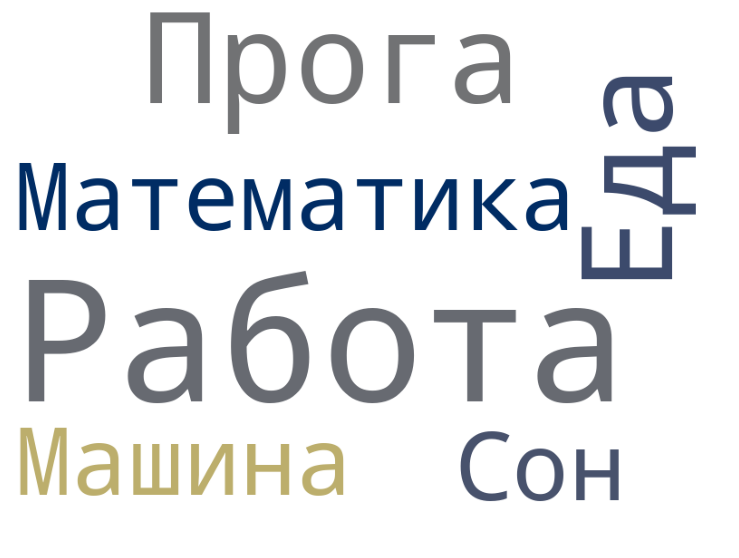

In [53]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

for i in 'я мой труды'.split(' '):
  STOPWORDS.add(i)

#!!!обязательно устанавливаем collocations=False - игнорирование биграмм!!!
wordcloud = WordCloud(background_color='white', 
                      colormap = 'cividis', 
                      width = 800,
                      height = 600,
                      collocations=False, 
                      stopwords = STOPWORDS).generate(','.join(objects))

# Рисуем результат
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **3 - Круговая диаграмма**
**Как проходит твой день?**

Чтобы устроиться на работу, важно учитывать свое расписание. Выделите 10 дел, которые Вы выполяете ежедневно. Замерьте время в минутах - сколько у вас оно занимает ежедневно. 

Для наглядности отрисуйте график- диаграмму "пирог", на котором будет наглядно видно, сколько занимает времени в процентном соотношении от дня каждое ваше дело. Также на графике покажите, сколько у Вас остается свободного времени.

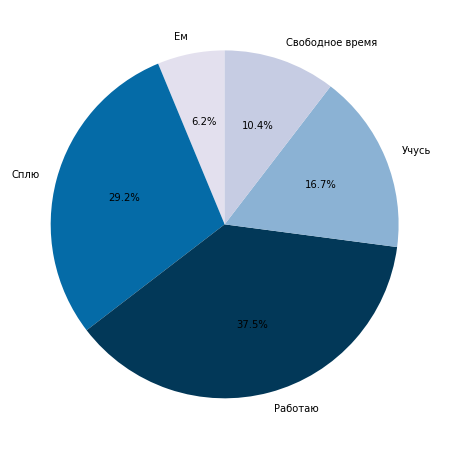

In [54]:
my_day = [1.5, 7, 9, 4]
#вычисляем сколько свободного времени остается (количество минут в дне - задействованных минут )
free_time = 24 - sum(my_day)
my_day.append(free_time)

doies = ["Ем", "Сплю", "Работаю", "Учусь", "Свободное время"]

cmap = plt.get_cmap("PuBu")

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
plt.pie(my_day, 
        labels=doies, 
        autopct='%1.1f%%',
        startangle=90,
        colors = [cmap(i / max(my_day)) for i in my_day]
        )

plt.show()

In [55]:
my_free_time = free_time*60
print("Свободных минут в моем дне: "  , my_free_time)
print("Свободных часов в моем дне: "  , my_free_time/60)

Свободных минут в моем дне:  150.0
Свободных часов в моем дне:  2.5


# **4 - Столбчатая диаграмма**

_____
А теперь те же самые данные отобразим столбчатой диаграммой! Для этого задаем размер, передаем сами данные осей X и Y, подписываем заголовок графика и координаты. Последней строкой - автоматически корректируем подписи оси X графика.

In [56]:
my_day, doies = zip(*sorted(zip(my_day, doies)))
cmap = plt.get_cmap('YlGn')

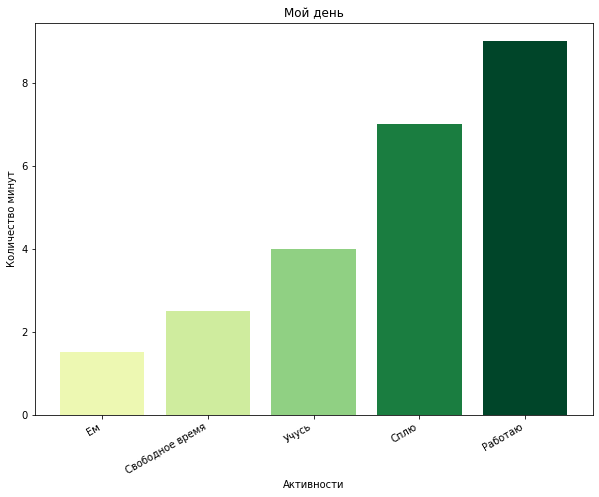

In [57]:
plt.figure(figsize=(10,8))
plt.bar(doies, my_day, color = [cmap(i/max(my_day)) for i in my_day])
plt.title('Мой день')
plt.xlabel('Активности')
plt.ylabel('Количество минут')
plt.gcf().autofmt_xdate()

Чем отличаются столбчатый график и круговая диаграмма? Какой график лучше подходит для частотного анализа (когда выявляем какое значение встречается чаще, является популярней)? Какой график больше подходит для ограниченного по сумме значений, когда нужно показать, что у значений есть лимит в виде бюджета, времени и т.д.? Почему?

# **5 - Комбинированный график**
**Анализ шагов в течение недели**

In [58]:
import numpy as np
date = ["10.09.2022","11.09.2022","12.09.2022","13.09.2022","14.09.2022","15.09.2022","16.09.2022"]
mark = np.array([[9394, 8524, 9749, 8487, 8940, 10054, 10037],
    [10013, 9624, 8911, 9112, 8039, 9666, 8138],
    [7952, 9189, 8942, 8541, 10208, 9625, 9730],
    [8356, 10035, 9392, 8683, 8513, 8854, 8418]])

In [59]:
mark.transpose()

array([[ 9394, 10013,  7952,  8356],
       [ 8524,  9624,  9189, 10035],
       [ 9749,  8911,  8942,  9392],
       [ 8487,  9112,  8541,  8683],
       [ 8940,  8039, 10208,  8513],
       [10054,  9666,  9625,  8854],
       [10037,  8138,  9730,  8418]])

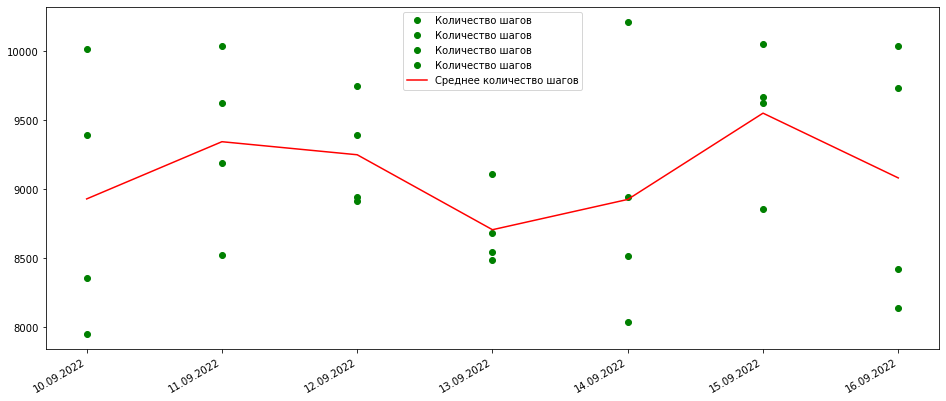

In [60]:
plt.figure(figsize = (16, 7))
plt.plot(date, mark.transpose(), 'go', label = 'Количество шагов')
plt.plot(date, mark.mean(axis = 0), 'r-', label =  "Среднее количество шагов")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()